In [1]:

import pandas as pd

In [2]:
df=pd.read_csv('SMSSpamCollection.txt',sep='\t',names=["label","message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
df['label'] = df['label'].replace({'ham': 1, 'spam': 0})

C:\Users\HP\AppData\Local\Temp\ipykernel_93812\3447024164.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({'ham': 1, 'spam': 0})


In [5]:
# Removing last 30 rows for manual testing
df_testing = df.head(30)
for i in range(0,30):
    df.drop([i], axis = 0, inplace = True)


In [6]:
df_testing.head(5)

,label,message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df_testing.to_csv("testing.csv")

In [8]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from tqdm import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:

tqdm.pandas(desc="Preprocessing text")  # Initialize progress bar

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))
# Preprocessing function
def preprocess(text):
    # Keep only letters and lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower().split()
    # Remove stopwords and stem
    words = [ps.stem(word) for word in text if word not in stop_words]
    return ' '.join(words)

# Apply to entire column with progress bar
df['message'] = df['message'].progress_apply(preprocess)



Preprocessing text: 100%|██████████| 5542/5542 [00:00<00:00, 10552.60it/s]


In [11]:
x = df["message"]
y = df["label"]

In [12]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


In [17]:
from sklearn.metrics import accuracy_score,classification_report

In [16]:
# Choose a model
models = {
  
    "Logistic": LogisticRegression(max_iter=200),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=100),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100),

}

In [22]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(xv_train, y_train)
    y_pred = model.predict(xv_test)
    print("=== Model:", name, "===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
  

=== Model: Logistic ===
Accuracy: 0.9603246167718665
=== Model: DecisionTree ===
Accuracy: 0.9621280432822362
=== Model: RandomForest ===
Accuracy: 0.9729486023444545
=== Model: GradientBoosting ===
Accuracy: 0.9666366095581606


In [24]:

for name, model in models.items():
    model.fit(xv_train, y_train)  
    y_pred = model.predict(xv_test)
    print("=== Model:", name, "===")
    print("Classification Report:\n", classification_report(y_test, y_pred))

=== Model: Logistic ===
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.75      0.84       157
           1       0.96      0.99      0.98       952

    accuracy                           0.96      1109
   macro avg       0.96      0.87      0.91      1109
weighted avg       0.96      0.96      0.96      1109

=== Model: DecisionTree ===
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86       157
           1       0.97      0.99      0.98       952

    accuracy                           0.96      1109
   macro avg       0.95      0.90      0.92      1109
weighted avg       0.96      0.96      0.96      1109

=== Model: RandomForest ===
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90       157
           1       0.97      1.00      0.99       952

    accuracy                  

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

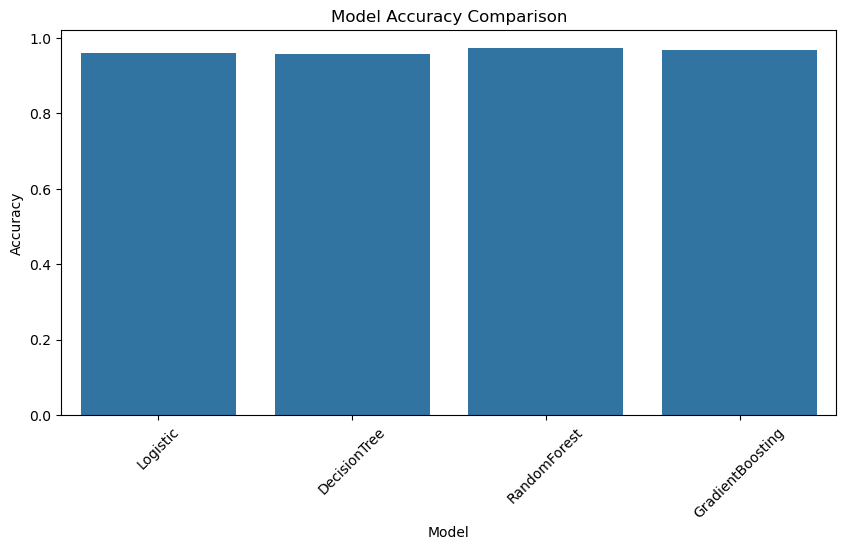

In [ ]:
#bar plot for accuracy comparison
accuracy_results = {}
for name, model in models.items():
    model.fit(xv_train, y_train)
    y_pred = model.predict(xv_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

# Plotting and showing the accuracy comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

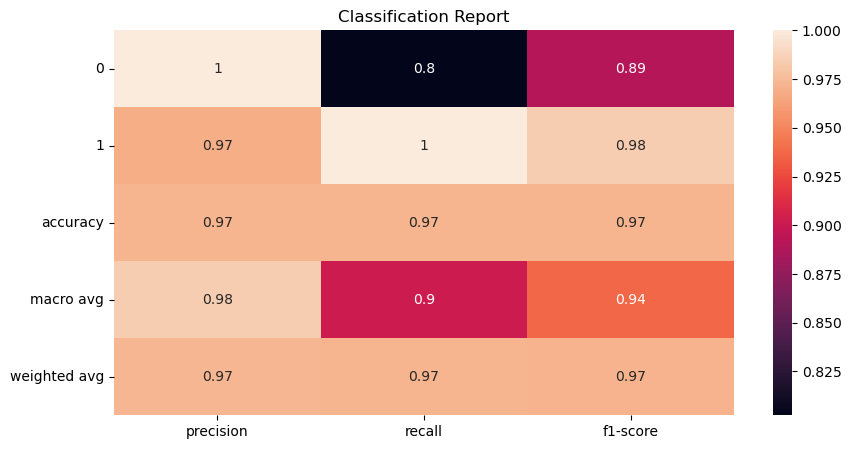

In [32]:
# Visualize the classification report for the best model (e.g., RandomForest)
best_model = models["RandomForest"]
y_pred = best_model.predict(xv_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Visualizing the classification report
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)
plt.title("Classification Report")
plt.show()

In [25]:
# Save the trained RandomForest model and vectorizer
import joblib

# Save RandomForest model
joblib.dump(models["RandomForest"], "random_forest_model.pkl")
joblib.dump(models["Logistic"], "logistic_model.pkl")
joblib.dump(models["DecisionTree"], "DecisionTree_model.pkl")
joblib.dump(models["GradientBoosting"], "GradientBoosting_model.pkl")


# Save TfidfVectorizer
joblib.dump(vectorization, "tfidf_vectorizer.pkl")

print("ALL Model and vectorizer saved")

ALL Model and vectorizer saved


In [26]:

# Load saved models and vectorizer
rf_model = joblib.load("random_forest_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Example: Predict on new news text
def predict_news(news_text):
    processed = preprocess(news_text)
    vect = vectorizer.transform([processed])
    pred = rf_model.predict(vect)
    return "negative" if pred[0] == 0 else "positive"

# Test with a sample news
sample_news = "Your news article text here"
print(predict_news(sample_news))

positive


In [28]:
# Batch prediction on testing.csv
import pandas as pd

test_df = pd.read_csv("testing.csv")

# Preprocess and predict
preds = []
for text in test_df['message']:
    processed = preprocess(str(text))
    vect = vectorizer.transform([processed])
    pred = rf_model.predict(vect)
    preds.append(pred[0])

test_df['predicted_class'] = preds
test_df['predicted_label'] = test_df['predicted_class'].apply(lambda x: 'spam' if x == 0 else 'ham')

test_df.to_csv("testing_with_predictions.csv", index=False)
print("Batch predictions saved to testing_with_predictions.csv")

Batch predictions saved to testing_with_predictions.csv


In [29]:
df1=pd.read_csv("testing_with_predictions.csv")
df1.head(30)

,Unnamed: 0,label,message,predicted_class,predicted_label
0,0,1,"Go until jurong point, crazy.. Available only ...",1,ham
1,1,1,Ok lar... Joking wif u oni...,1,ham
2,2,0,Free entry in 2 a wkly comp to win FA Cup fina...,0,spam
3,3,1,U dun say so early hor... U c already then say...,1,ham
4,4,1,"Nah I don't think he goes to usf, he lives aro...",1,ham
5,5,0,FreeMsg Hey there darling it's been 3 week's n...,1,ham
6,6,1,Even my brother is not like to speak with me. ...,1,ham
7,7,1,As per your request 'Melle Melle (Oru Minnamin...,1,ham
8,8,0,WINNER!! As a valued network customer you have...,0,spam
9,9,0,Had your mobile 11 months or more? U R entitle...,0,spam
